In [3]:
# 1. imports
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report
import pandas as pd
import json
import importlib
import math



try:
    from IPython import get_ipython
    if 'IPKernelApp' not in get_ipython().config:  # Not in a notebook
        from tqdm import tqdm
    else:  # In a notebook
        from tqdm.notebook import tqdm
except ImportError:  # IPython is not installed
    from tqdm import tqdm
import utils
from utils import get_accuracy, run_training_and_validation, run_testing, BaselineNet, DropoutNet

# importlib.reload(utils)


# 2. set up for using GPU if available (with printed confirmation)  
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

batch_size = 64

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_data = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

num_validation_samples = 5000
num_train_samples = len(train_data) - num_validation_samples

train_data, val_data = random_split(train_data, [num_train_samples, num_validation_samples])

print(len(train_data)) # 50000 training egs  
print(len(val_data)) # 10000 test egs
print(len(test_data)) # 10000 test egs

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Using cuda device
Files already downloaded and verified
45000
5000
10000


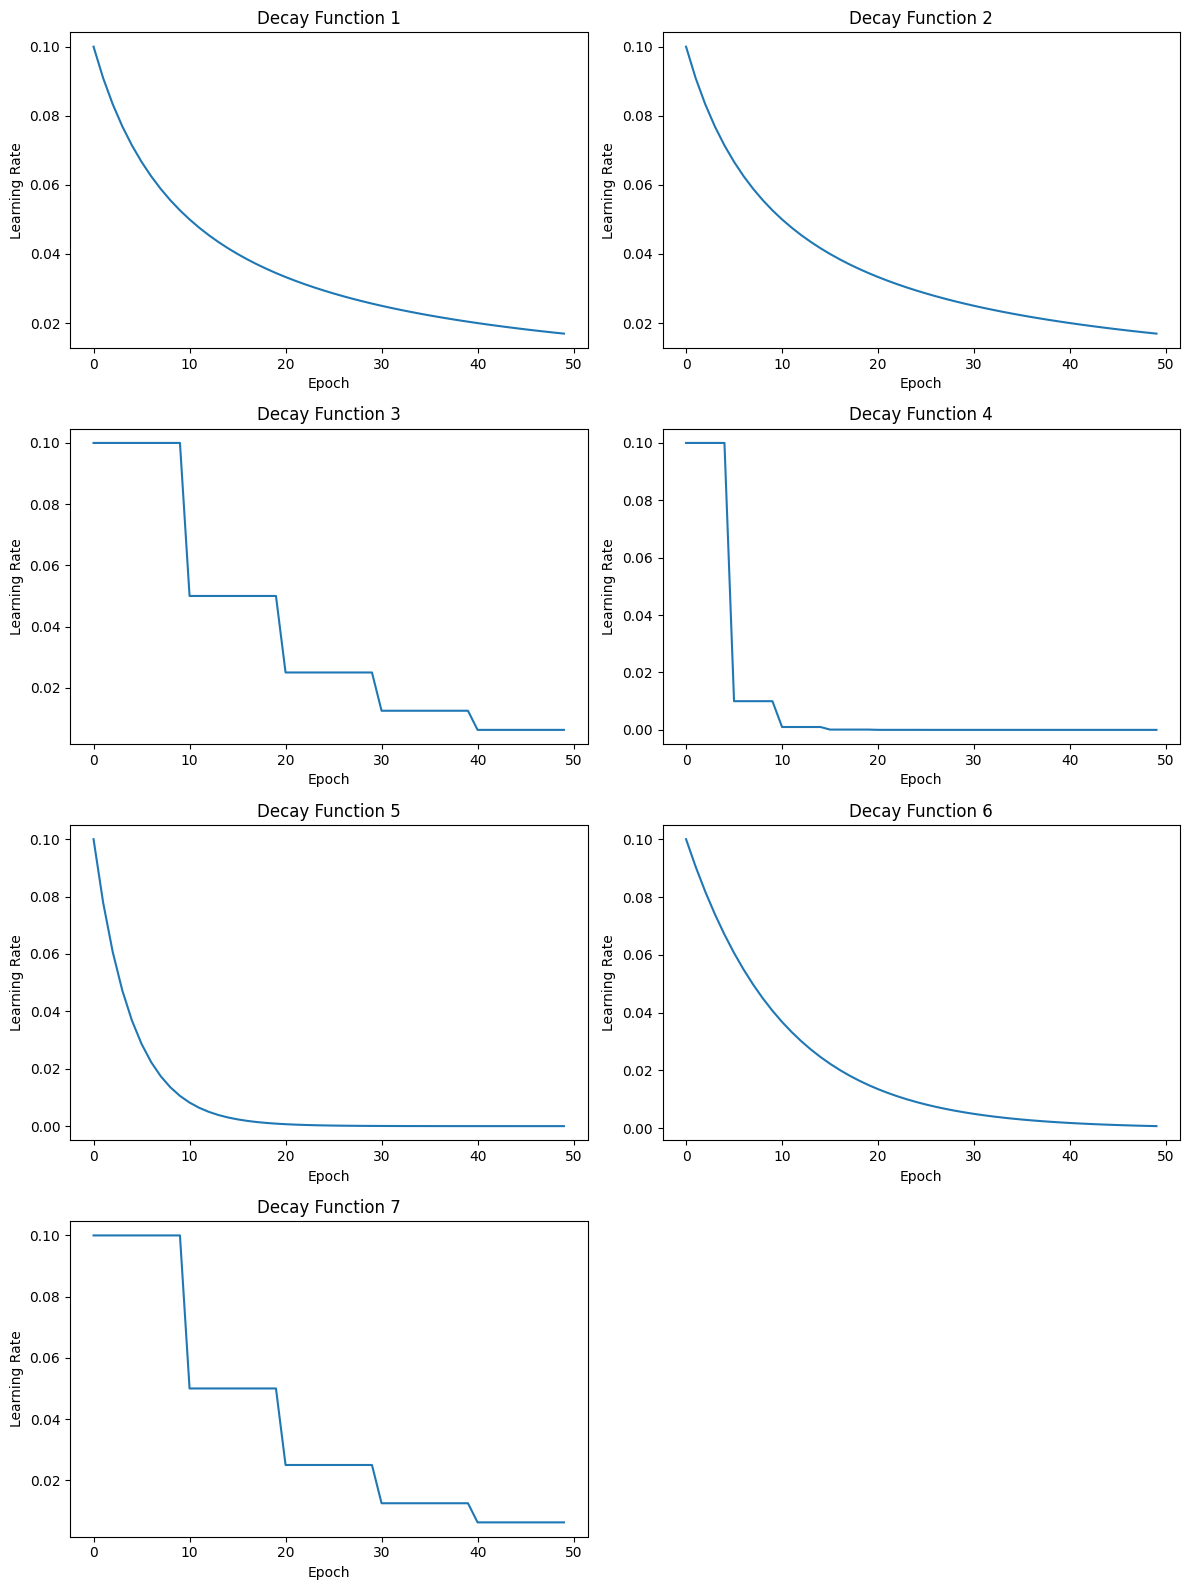

In [2]:
import matplotlib.pyplot as plt
import math

def adjust_learning_rate_1(epoch, initial_lr=0.1, decay_rate=0.1):
    new_lr = initial_lr / (1 + decay_rate * epoch)
    return new_lr

def adjust_learning_rate_2(epoch, initial_lr=0.1, decay_rate=0.1):
    new_lr = initial_lr / (1 + decay_rate * epoch)
    return new_lr

def adjust_learning_rate_3(epoch, initial_lr=0.1, decay_interval=10, decay_rate=0.5):
    num_decays = epoch // decay_interval
    new_lr = initial_lr * (decay_rate ** num_decays)
    return new_lr

def adjust_learning_rate_4(epoch, initial_lr=0.1, decay_interval=5, decay_rate=0.1):
    num_decays = epoch // decay_interval
    new_lr = initial_lr * (decay_rate ** num_decays)
    return new_lr

def adjust_learning_rate_5(epoch, initial_lr=0.1, decay_rate=0.25):
    new_lr = initial_lr * (math.e ** (-1 * decay_rate * epoch))
    return new_lr

def adjust_learning_rate_6(epoch, initial_lr=0.1, decay_rate=0.1):
    new_lr = initial_lr * (math.e ** (-1 * decay_rate * epoch))
    return new_lr

def adjust_learning_rate_7(epoch, initial_lr=0.1, decay_interval=10, decay_rate=0.5):
    num_decays = epoch // decay_interval
    new_lr = initial_lr * (decay_rate ** num_decays)
    return new_lr

num_epochs = 50
initial_lr = 0.1

lr_func_1 = [adjust_learning_rate_1(epoch, initial_lr) for epoch in range(num_epochs)]
lr_func_2 = [adjust_learning_rate_2(epoch, initial_lr) for epoch in range(num_epochs)]
lr_func_3 = [adjust_learning_rate_3(epoch, initial_lr) for epoch in range(num_epochs)]
lr_func_4 = [adjust_learning_rate_4(epoch, initial_lr) for epoch in range(num_epochs)]
lr_func_5 = [adjust_learning_rate_5(epoch, initial_lr) for epoch in range(num_epochs)]
lr_func_6 = [adjust_learning_rate_6(epoch, initial_lr) for epoch in range(num_epochs)]
lr_func_7 = [adjust_learning_rate_7(epoch, initial_lr) for epoch in range(num_epochs)]

fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()

axs[0].plot(range(num_epochs), lr_func_1)
axs[0].set_title('Decay Function 1')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Learning Rate')

axs[1].plot(range(num_epochs), lr_func_2)
axs[1].set_title('Decay Function 2')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Learning Rate')

axs[2].plot(range(num_epochs), lr_func_3)
axs[2].set_title('Decay Function 3')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Learning Rate')

axs[3].plot(range(num_epochs), lr_func_4)
axs[3].set_title('Decay Function 4')
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('Learning Rate')

axs[4].plot(range(num_epochs), lr_func_5)
axs[4].set_title('Decay Function 5')
axs[4].set_xlabel('Epoch')
axs[4].set_ylabel('Learning Rate')

axs[5].plot(range(num_epochs), lr_func_6)
axs[5].set_title('Decay Function 6')
axs[5].set_xlabel('Epoch')
axs[5].set_ylabel('Learning Rate')

axs[6].plot(range(num_epochs), lr_func_7)
axs[6].set_title('Decay Function 7')
axs[6].set_xlabel('Epoch')
axs[6].set_ylabel('Learning Rate')

axs[7].axis('off')  # Remove the empty subplot

plt.tight_layout()
plt.show()

In [ ]:
imp


In [3]:
from utils import plot_all_models_performance_from_disk, plot_performance_comparison_from_file, plot_single_train_val_smoothed

path = 'run_data\lr_data_35_epochs.json'

# plot_all_models_performance_from_disk(path, variable_name='LR', enforce_axis_range=True)


LR:  0.1
func:  0
LR: 0.1
Epoch [1/40] - Train Loss: 2.2946, Acc: 0.1265 | Val Loss: 2.2434, Acc: 0.1930
LR: 0.09900990099009901
Epoch [2/40] - Train Loss: 2.1734, Acc: 0.2743 | Val Loss: 2.1270, Acc: 0.3259
LR: 0.09803921568627451
Epoch [3/40] - Train Loss: 2.0977, Acc: 0.3571 | Val Loss: 2.1831, Acc: 0.2603
LR: 0.0970873786407767
Epoch [4/40] - Train Loss: 2.0418, Acc: 0.4171 | Val Loss: 2.1675, Acc: 0.2842
LR: 0.09615384615384616
Epoch [5/40] - Train Loss: 2.0010, Acc: 0.4582 | Val Loss: 2.0541, Acc: 0.4039
LR: 0.09523809523809523
Epoch [6/40] - Train Loss: 1.9696, Acc: 0.4896 | Val Loss: 2.0156, Acc: 0.4361
LR: 0.09433962264150944
Epoch [7/40] - Train Loss: 1.9383, Acc: 0.5213 | Val Loss: 2.2403, Acc: 0.2150
LR: 0.09345794392523364
Epoch [8/40] - Train Loss: 1.9139, Acc: 0.5453 | Val Loss: 1.9170, Acc: 0.5433
LR: 0.09259259259259259
Epoch [9/40] - Train Loss: 1.8796, Acc: 0.5811 | Val Loss: 1.9549, Acc: 0.5044
LR: 0.09174311926605505
Epoch [10/40] - Train Loss: 1.8542, Acc: 0.6069 

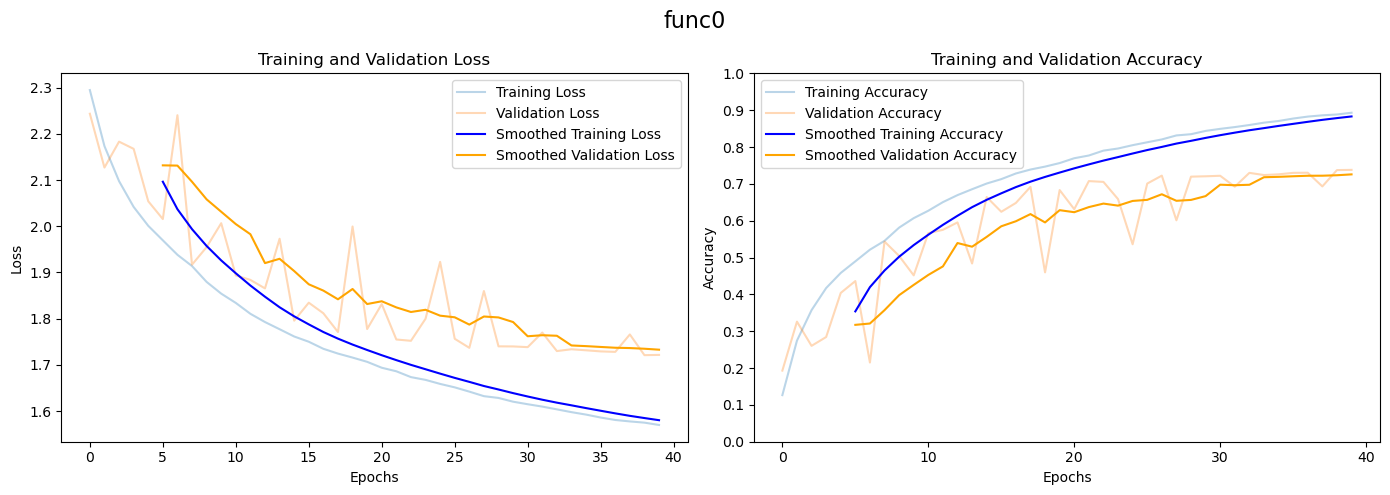

func:  1
LR: 0.1
Epoch [1/40] - Train Loss: 2.2947, Acc: 0.1265 | Val Loss: 2.2435, Acc: 0.1930
LR: 0.09523809523809523
Epoch [2/40] - Train Loss: 2.1752, Acc: 0.2723 | Val Loss: 2.1302, Acc: 0.3200
LR: 0.09090909090909091
Epoch [3/40] - Train Loss: 2.1003, Acc: 0.3545 | Val Loss: 2.1759, Acc: 0.2662
LR: 0.08695652173913045
Epoch [4/40] - Train Loss: 2.0449, Acc: 0.4127 | Val Loss: 2.2316, Acc: 0.2207
LR: 0.08333333333333334
Epoch [5/40] - Train Loss: 2.0070, Acc: 0.4517 | Val Loss: 2.0397, Acc: 0.4163
LR: 0.08
Epoch [6/40] - Train Loss: 1.9746, Acc: 0.4843 | Val Loss: 2.1020, Acc: 0.3523
LR: 0.07692307692307693
Epoch [7/40] - Train Loss: 1.9474, Acc: 0.5127 | Val Loss: 2.2051, Acc: 0.2480
LR: 0.07407407407407407
Epoch [8/40] - Train Loss: 1.9237, Acc: 0.5360 | Val Loss: 1.9587, Acc: 0.4992
LR: 0.07142857142857144
Epoch [9/40] - Train Loss: 1.8948, Acc: 0.5660 | Val Loss: 1.9070, Acc: 0.5524
LR: 0.06896551724137931
Epoch [10/40] - Train Loss: 1.8675, Acc: 0.5942 | Val Loss: 2.0593, Acc

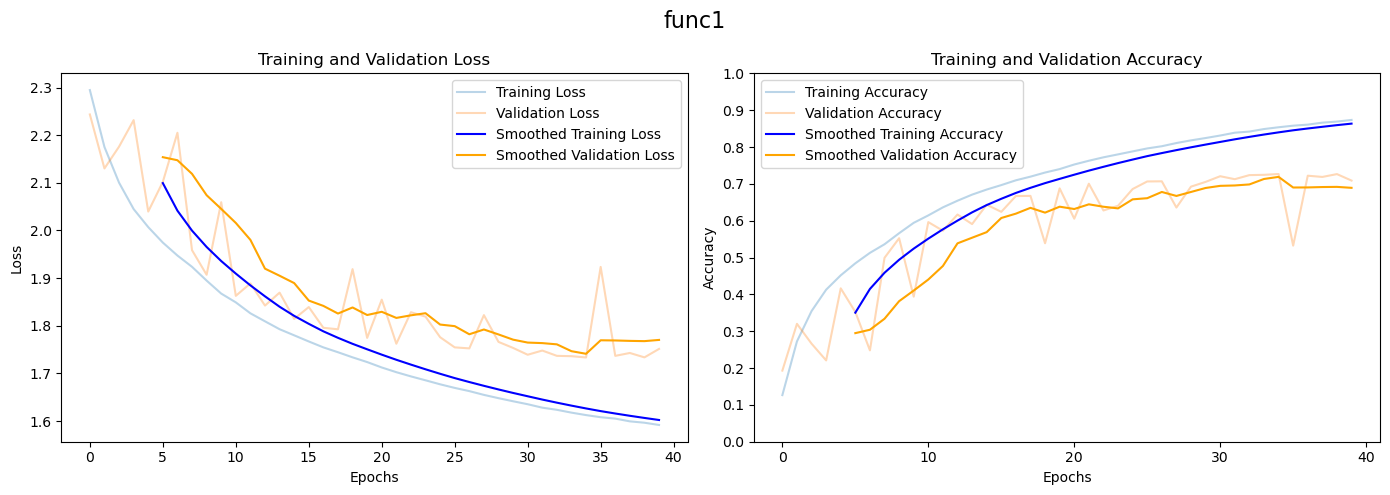

func:  2
LR: 0.1
Epoch [1/40] - Train Loss: 2.2947, Acc: 0.1264 | Val Loss: 2.2435, Acc: 0.1936
LR: 0.09090909090909091
Epoch [2/40] - Train Loss: 2.1764, Acc: 0.2708 | Val Loss: 2.1371, Acc: 0.3145
LR: 0.08333333333333334
Epoch [3/40] - Train Loss: 2.1029, Acc: 0.3509 | Val Loss: 2.1876, Acc: 0.2538
LR: 0.07692307692307693
Epoch [4/40] - Train Loss: 2.0504, Acc: 0.4074 | Val Loss: 2.1844, Acc: 0.2664
LR: 0.07142857142857144
Epoch [5/40] - Train Loss: 2.0131, Acc: 0.4458 | Val Loss: 2.0303, Acc: 0.4260
LR: 0.06666666666666667
Epoch [6/40] - Train Loss: 1.9814, Acc: 0.4778 | Val Loss: 2.0908, Acc: 0.3671
LR: 0.0625
Epoch [7/40] - Train Loss: 1.9576, Acc: 0.5021 | Val Loss: 2.0659, Acc: 0.3888
LR: 0.058823529411764705
Epoch [8/40] - Train Loss: 1.9341, Acc: 0.5270 | Val Loss: 1.9737, Acc: 0.4824
LR: 0.05555555555555556
Epoch [9/40] - Train Loss: 1.9112, Acc: 0.5504 | Val Loss: 1.9487, Acc: 0.5083
LR: 0.052631578947368425
Epoch [10/40] - Train Loss: 1.8901, Acc: 0.5719 | Val Loss: 1.9682,

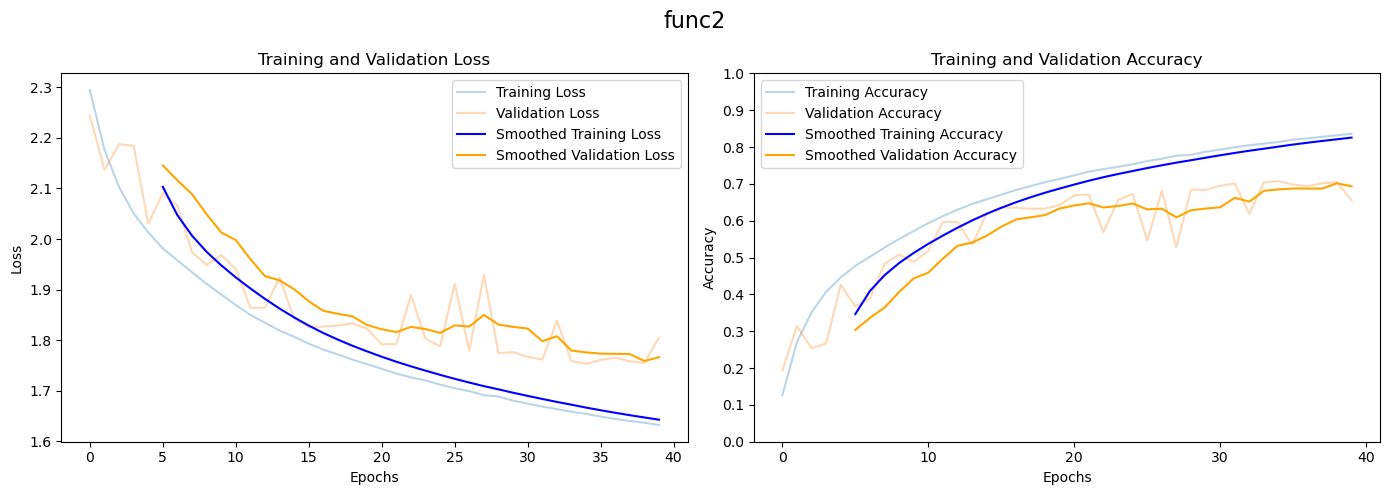

In [4]:
def adjust_learning_rate_1(optimiser, epoch, initial_lr=0.1, decay_rate=0.01):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:', optimiser.param_groups[0]['lr'])
    return optimiser
def adjust_learning_rate_2(optimiser, epoch, initial_lr=0.1, decay_rate=0.05):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:', optimiser.param_groups[0]['lr'])
    return optimiser
def adjust_learning_rate_3(optimiser, epoch, initial_lr=0.1, decay_rate=0.1):    
    new_lr = initial_lr / (1 + decay_rate *epoch)
    for param_group in optimiser.param_groups:
        param_group['lr'] = new_lr
    print('LR:', optimiser.param_groups[0]['lr'])
    return optimiser



#BEST
# def adjust_learning_rate_3(optimiser, epoch, initial_lr=0.1, decay_interval=10, decay_rate=0.5):    
#     if epoch % decay_interval == 0 and epoch != 0:
#         new_lr = initial_lr * (decay_rate ** (epoch // decay_interval))
#         for param_group in optimiser.param_groups:
#             param_group['lr'] = new_lr
#         print('Updated LR:', new_lr)
#     else:
#         print('LR not updated this epoch')

#     print(optimiser.param_groups[0]['lr'])
#     return optimiser

# def adjust_learning_rate_6(optimiser, epoch, initial_lr=0.1, decay_rate=0.1):    

#     new_lr = initial_lr * (math.e**(-1*decay_rate*epoch))
#     for param_group in optimiser.param_groups:
#         param_group['lr'] = new_lr
        
#     print(optimiser.param_groups[0]['lr'])
#     return optimiser

lr_funcs = [adjust_learning_rate_1, adjust_learning_rate_2, adjust_learning_rate_3]

num_epochs = 40
# random_seeds = list(range(5))
learning_rates_for_experiment = [0.1]
averaged_results = {lr:{} for lr in learning_rates_for_experiment}

for learning_rate in learning_rates_for_experiment:
    print('LR: ', learning_rate) 
    epoch_train_losses_by_run = []
    epoch_val_losses_by_run = []
    epoch_train_accuracies_by_run = []
    epoch_val_accuracies_by_run = []
    test_losses = []
    test_accuracies = []
    reports = []
       
    for i, func in enumerate(lr_funcs):
        print('func: ', i) 
        model = BaselineNet(0).to(device)
        criterion = nn.CrossEntropyLoss()
        optimiser = optim.SGD(model.parameters(), lr=learning_rate)

        model,train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, train_report,val_report = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, manual_lr_schedule=True, scheduler_func=func)
        epoch_train_losses_by_run.append(train_epoch_losses)
        epoch_val_losses_by_run.append(val_epoch_losses)
        epoch_train_accuracies_by_run.append(train_epoch_accuracy)
        epoch_val_accuracies_by_run.append(val_epoch_accuracy)
        
        test_loss, test_accuracy, report = run_testing(model, device, criterion, test_dataloader)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        reports.append(report)
        plot_single_train_val_smoothed(train_epoch_losses, val_epoch_losses, train_epoch_accuracy, val_epoch_accuracy, num_epochs, smoothing_window=6, title=f'func{i}')

In [20]:
def plot_adjusting_lr(initial_lr, decay_rate, num_epochs):
    print('ADJUSTING!')
    learning_rates = []
    epochs = list(range(num_epochs))

    for epoch in epochs:
        lr = initial_lr / (1 + decay_rate * epoch)
        learning_rates.append(lr)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, learning_rates, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title(f'Adjusting Learning Rate\nInitial LR: {initial_lr}, Decay Rate: {decay_rate}')
    plt.grid(True)
    plt.xticks(range(0, num_epochs, 5))
    plt.show()
    # print([learning_rates[n] for n in [0, 25, 50, 75, 99]])

ADJUSTING!


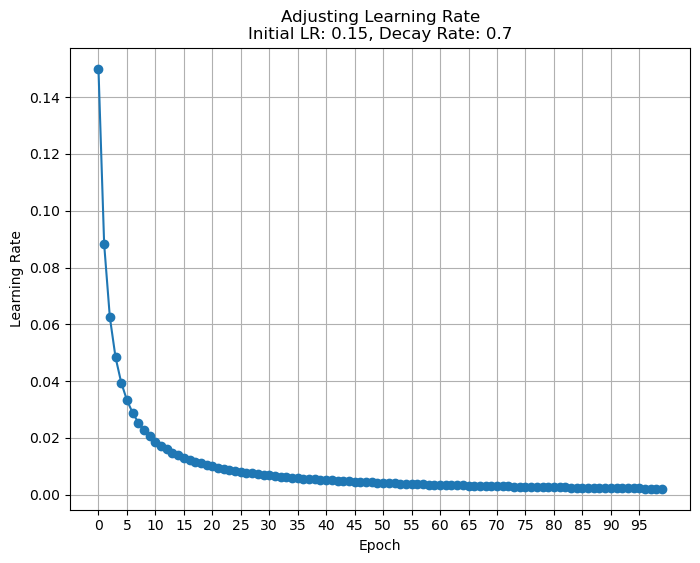

In [22]:
plot_adjusting_lr(0.15, 0.7, 100)